## Opening up multiple ROOT files with extracted calorimeter features. These are mixed electrons and gammas at different energies.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
dataDir = "../Data/h5/"
dataFiles = ["EleEscan_8_95_flatNtuple.h5", "EleEscan_1_538_flatNtuple.h5", "GammaEscan_1_538_flatNtuple.h5", "GammaEscan_8_95_flatNtuple.h5"]

In [4]:
dataFile = []
for i in range(len(dataFiles)):
    dataFile.append(h5py.File(dataDir + dataFiles[i], "r"))
    #dataFile['flatNtuple'].attrs.items()

## Combining samples, and looking at the results.

In [5]:
data = {}
features = ['gunpx', 'gunpy', 'gunpz', 'm', 'gunE', 'pdgID', 'nhcalhits', 'necalhits', 'hcaltote', 'ecaltote']
for count, feature in enumerate(features):
    newFeature = []
    for fileN in range(len(dataFile)):
        newFeature += [event[count] for event in dataFile[fileN]['flatNtuple']]
    data[feature] = newFeature;

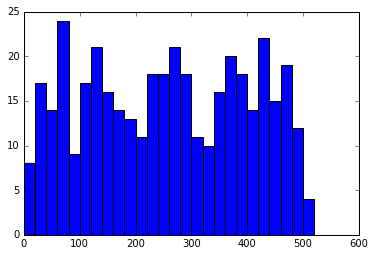

In [6]:
plt.hist(data['gunpx'], range=[0,600], bins=30);

0 out of 400 non-zero elements in gunpy


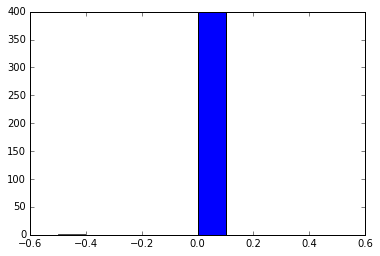

In [7]:
plt.hist(data['gunpy']);
print len([dataPoint for dataPoint in data['gunpy'] if dataPoint != 0]), "out of", len(data['gunpy']), "non-zero elements in gunpy"

0 out of 400 non-zero elements in gunpz


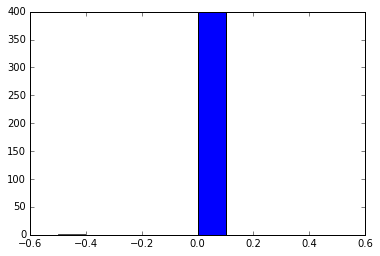

In [8]:
plt.hist(data['gunpz']);
print len([dataPoint for dataPoint in data['gunpz'] if dataPoint != 0]), "out of", len(data['gunpz']), "non-zero elements in gunpz"

200 out of 400 non-zero elements in m


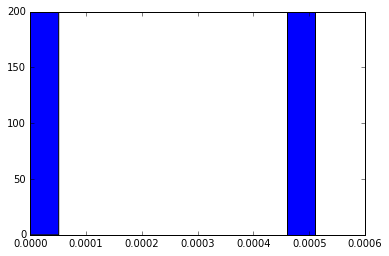

In [9]:
plt.hist(data['m']);
print len([dataPoint for dataPoint in data['m'] if dataPoint != 0]), "out of", len(data['m']), "non-zero elements in m"

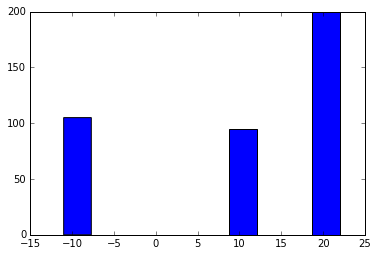

In [10]:
plt.hist(data['pdgID']);

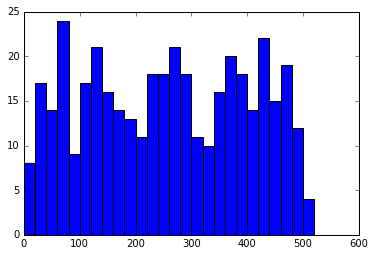

In [11]:
plt.hist(data['gunE'], range=[0,600], bins=30);

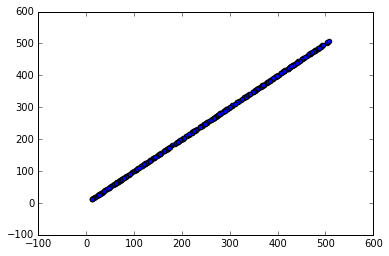

In [12]:
plt.scatter(data['gunE'], data['gunpx']);

## py and pz are 0. Only px varies (which I assume is in the direction of the beam). Gun energy is basically the same as px. Half the particles in this mixed dataset are electrons (or positrons)with 511 keV mass, and half are photons.

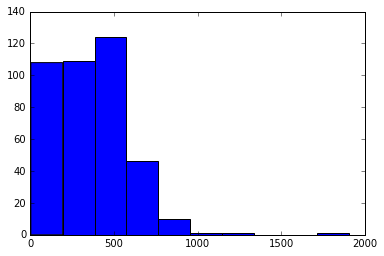

In [13]:
plt.hist(data['nhcalhits']);

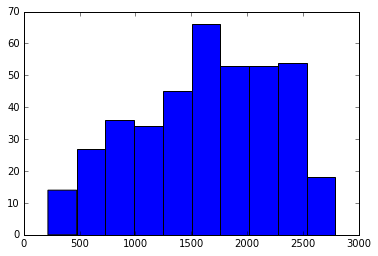

In [14]:
plt.hist(data['necalhits']);

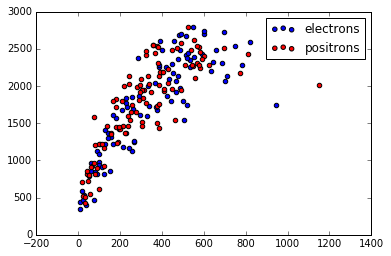

In [15]:
electronNHcal = [x for x, y in zip(data['nhcalhits'], data['pdgID']) if y == 11]
electronNEcal = [x for x, y in zip(data['necalhits'], data['pdgID']) if y == 11]
photonNHcal = [x for x, y in zip(data['nhcalhits'], data['pdgID']) if y == -11]
photonNEcal = [x for x, y in zip(data['necalhits'], data['pdgID']) if y == -11]
plt.scatter(electronNHcal, electronNEcal, c='b', label='electrons');
plt.scatter(photonNHcal, photonNEcal, c='r', label='positrons');
plt.legend();

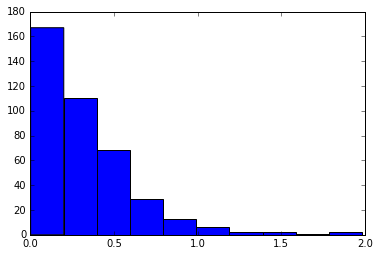

In [29]:
plt.hist(data['hcaltote']);

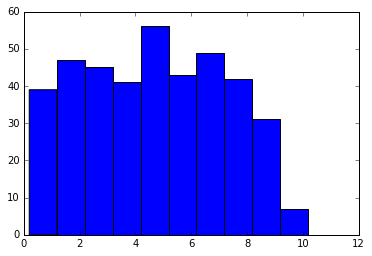

In [30]:
plt.hist(data['ecaltote']);

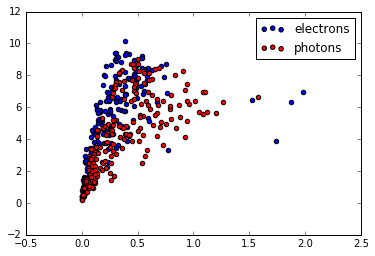

In [52]:
electronHcalTotE = [x for x, y in zip(data['hcaltote'], data['pdgID']) if abs(y) == 11]
photonHcalTotE = [x for x, y in zip(data['hcaltote'], data['pdgID']) if abs(y) == 22]
electronEcalTotE = [x for x, y in zip(data['ecaltote'], data['pdgID']) if abs(y) == 11]
photonEcalTotE = [x for x, y in zip(data['ecaltote'], data['pdgID']) if abs(y) == 22]
plt.scatter(electronHcalTotE, electronEcalTotE, c='b', label='electrons');
plt.scatter(photonHcalTotE, photonEcalTotE, c='r', label='photons');
plt.legend();

## ECAL and HCAL hits and energy are correlated, as expected. Now to look at their relation to gun energy.

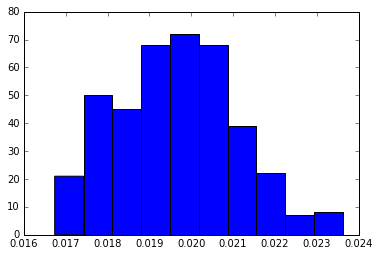

In [53]:
plt.hist([(a+b)/c for a,b,c in zip(data['hcaltote'], data['ecaltote'], data['gunE'])]);

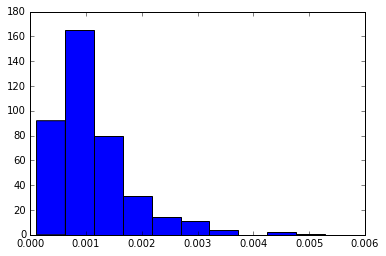

In [54]:
plt.hist([a/c for a,b,c in zip(data['hcaltote'], data['ecaltote'], data['gunE'])]);

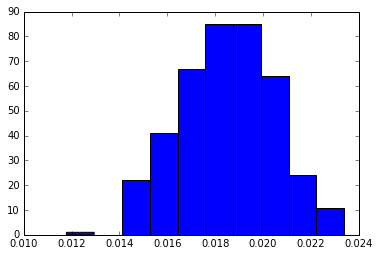

In [55]:
plt.hist([b/c for a,b,c in zip(data['hcaltote'], data['ecaltote'], data['gunE'])]);

## About 2% of the gun energy goes into the HCAL, and less than .1% goes into ECAL. There is a bit of a difference between the electron and photon samples in terms of energy in the HCAL vs. ECAL, though at this point I'm not sure if it's just statistics.